In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('train-data.csv')


In [5]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df.shape

(6019, 14)

In [9]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [10]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
df['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

In [12]:
df['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

## Quality
- New_Price column need to be dropped
- missing values in other columns can be imputed.
- Data type for Mileage , Engine and Power columns be float not object,achieved by removing the units (kmpl , cc , bhp)
- Kilometers_Driven ,Power ,Engine ,Price: these columns have outliers
- Mileage and Seats: these columns have zeros in some rows.
- Name column has high cardinality, solve it via feature engineering to get new features
- Owner_type is ordinal categorical feature that needs to be Encoded.

# Data Cleaning


In [13]:
round((df.isna().sum()/len(df))*100,2)

Unnamed: 0            0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

In [14]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

In [15]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [16]:
(df['Power'] == 'null bhp').sum()

107

In [17]:
df['Power'] = df['Power'].replace('null bhp',None)
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

In [18]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
554,Honda Civic 2006-2010 1.8 S MT,Ahmedabad,2007,51000,Petrol,Manual,First,13.5,1799.0,130.0,5.0,4.9


# Exploratory Data Ananysis

In [19]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [20]:
df.select_dtypes('object').describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


In [21]:
# Remove Outliers
for col in ['Engine','Power','Kilometers_Driven','Mileage','Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [22]:
# Feature Engineering
df['Name'].nunique()

1633

In [23]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

In [24]:
df['Company'].nunique() , df['Model'].nunique()

(26, 182)

# Univarate Analysis

remove outliers while performing univariate analysis.

In [25]:
# this function make the data fall in certain range.
def remove_outliers(df,col,lower,upper):
    df = df[ (df[col]>lower) & (df[col]<upper) ]
    return df

In [26]:
# this function plots histogram and boxplot for col parameter
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

# Year

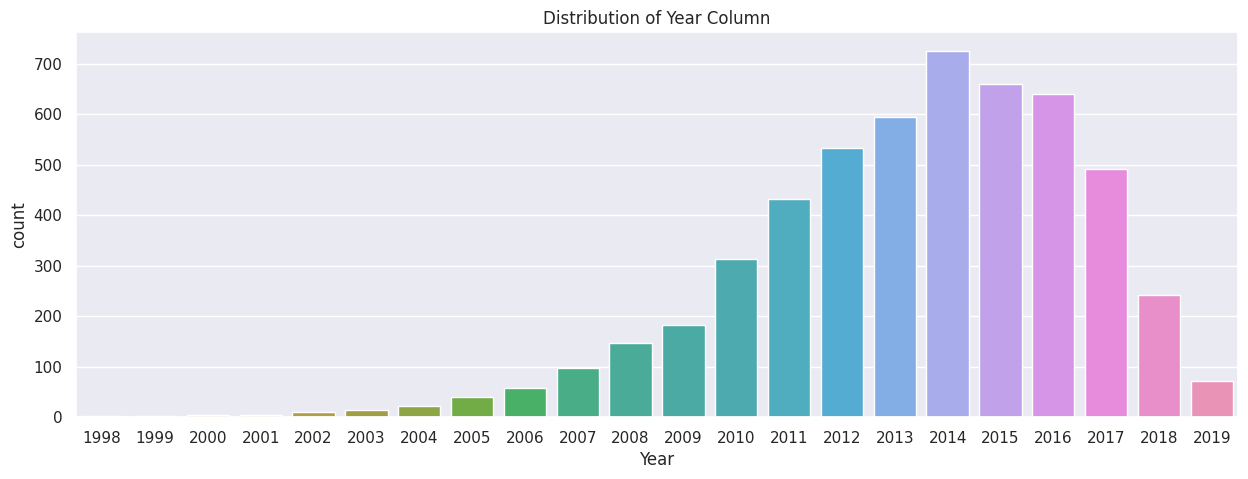

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Year');
plt.title('Distribution of Year Column');

# Kilometers driven

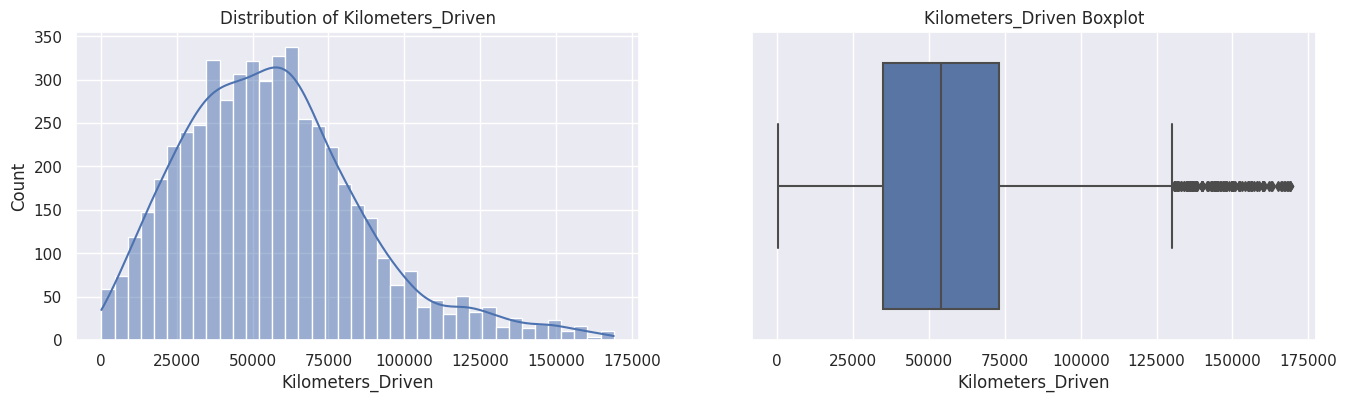

In [28]:
plot_num(df,'Kilometers_Driven')

# Fuel Type

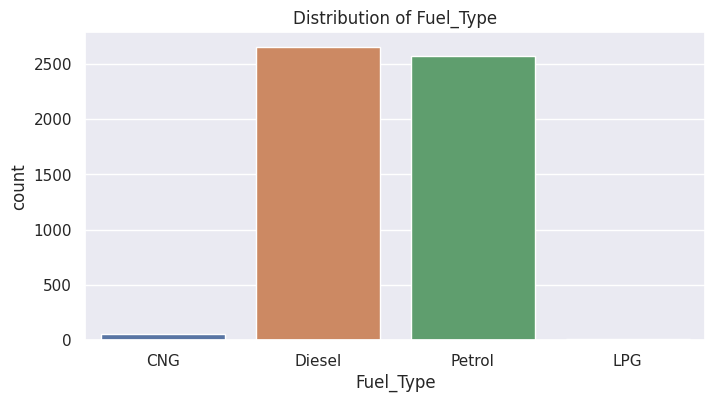

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');

In [30]:
# exclude Fuel_Types with low frequency from the dataset
df['Fuel_Type'].value_counts()

Diesel    2656
Petrol    2573
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [31]:
df = df[~df['Fuel_Type'].isin(['LPG','Electric'])]

#  Owner Type

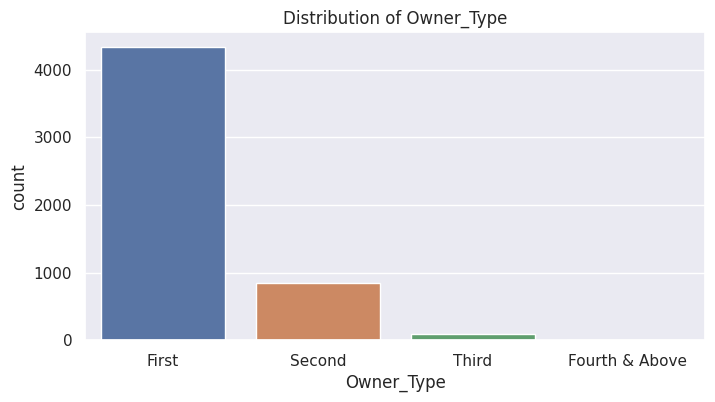

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Owner_Type');
plt.title('Distribution of Owner_Type');

In [33]:
df['Owner_Type'] = df['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})

# Mileage

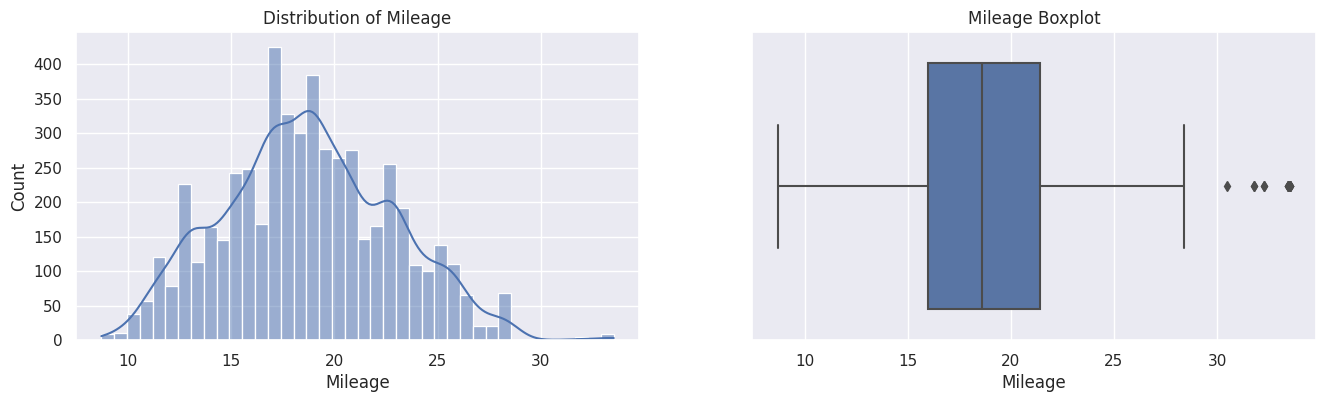

In [34]:
plot_num(df,'Mileage')

# Engine

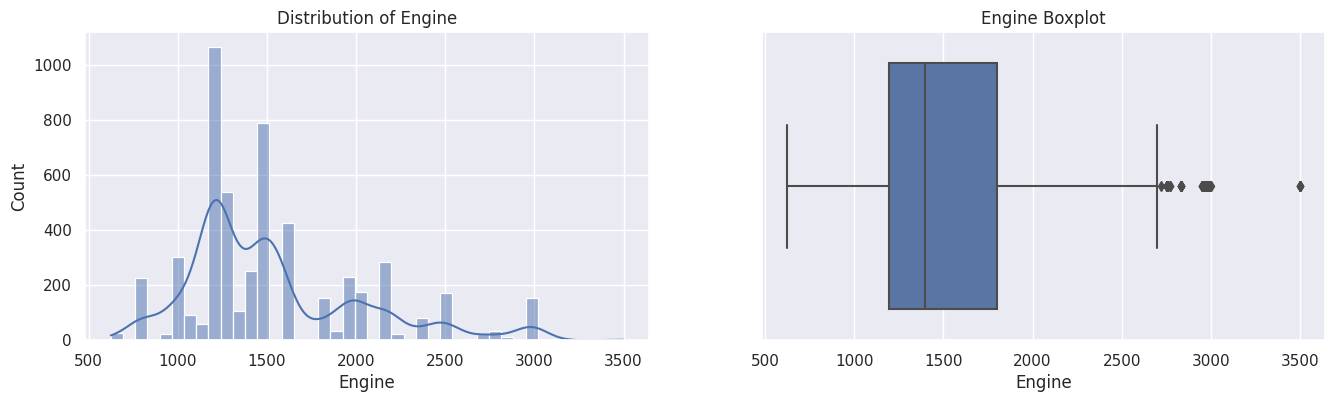

In [35]:
plot_num(df,'Engine')


# Power

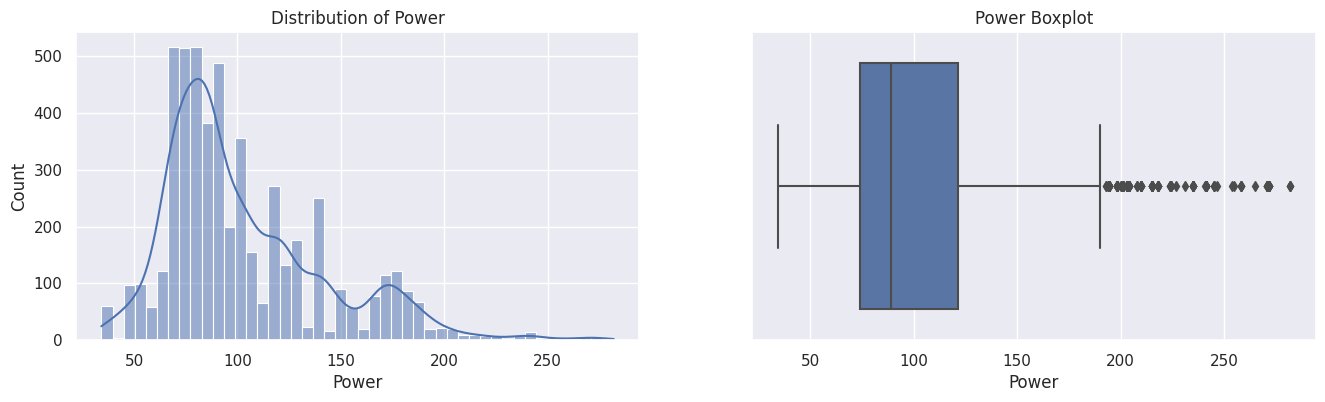

In [36]:
plot_num(df,'Power')

 # Seats

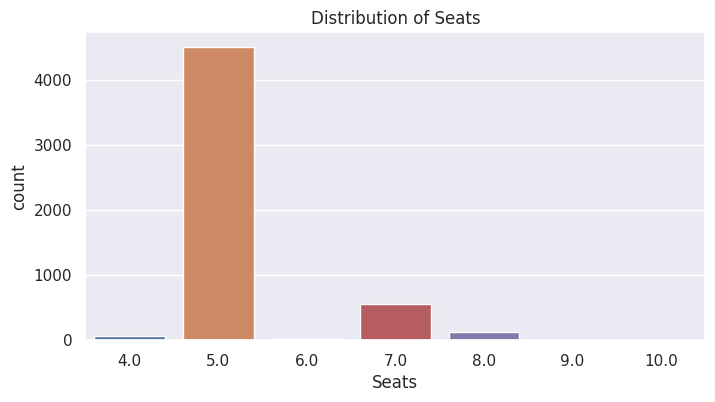

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Seats');
plt.title('Distribution of Seats');

In [38]:
df['Seats'].value_counts()

5.0     4509
7.0      558
8.0      121
4.0       62
6.0       26
10.0       4
9.0        3
Name: Seats, dtype: int64

In [39]:
#  exclude Seats with low frequency from the dataset
df = df[df.Seats.between(5,8)]

#  Company

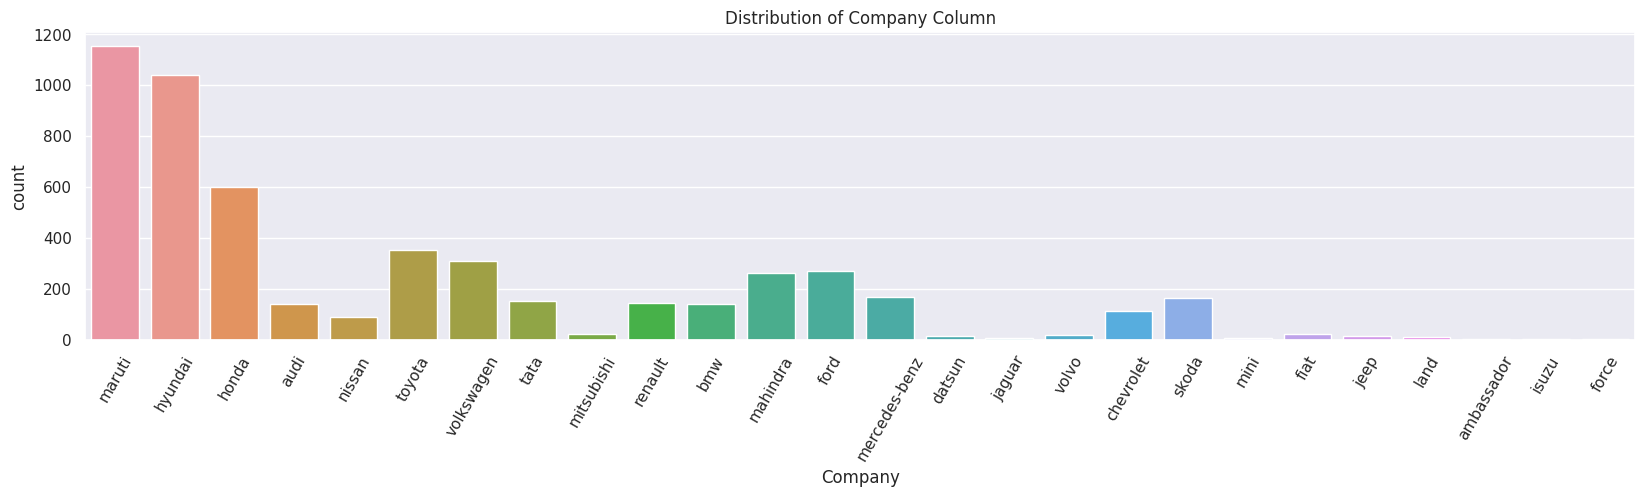

In [40]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

# Model

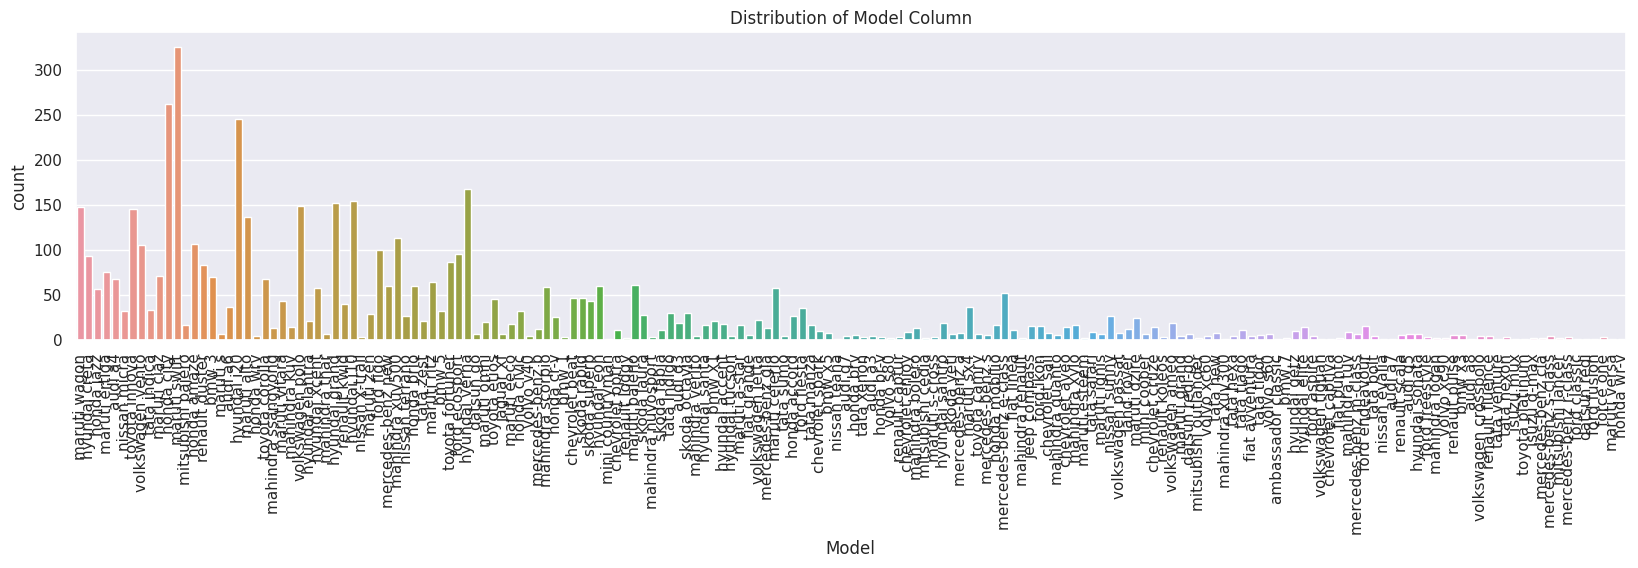

In [41]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

In [42]:
df.Model.value_counts()

maruti swift         326
honda city           262
hyundai i20          246
hyundai verna        168
hyundai i10          154
                    ... 
volkswagen tiguan      1
audi a8                1
chevrolet captiva      1
nissan evalia          1
honda wr-v             1
Name: Model, Length: 176, dtype: int64

In [43]:
# exclude car models with low frequency from the dataset
threshold = 10
counts = df.Model.value_counts()
to_drop = counts[counts<threshold].index.tolist()
df = df[~df['Model'].isin(to_drop)]

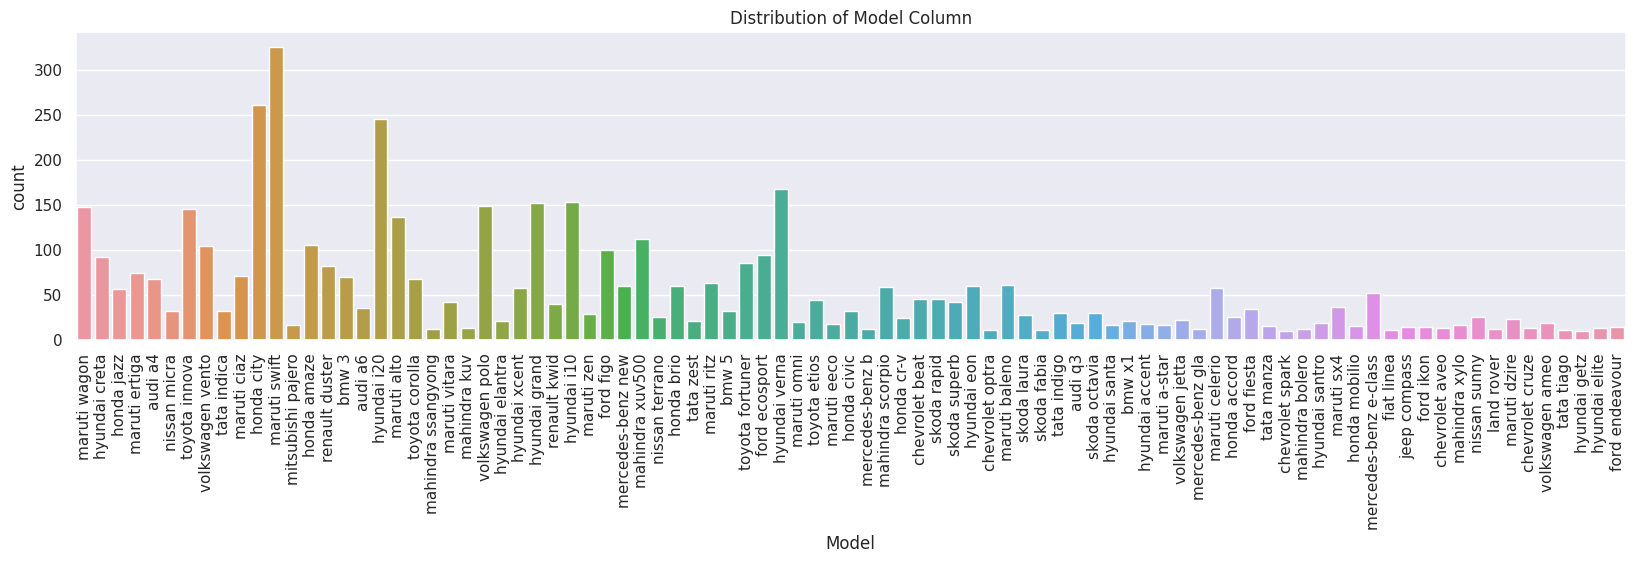

In [44]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

# Location

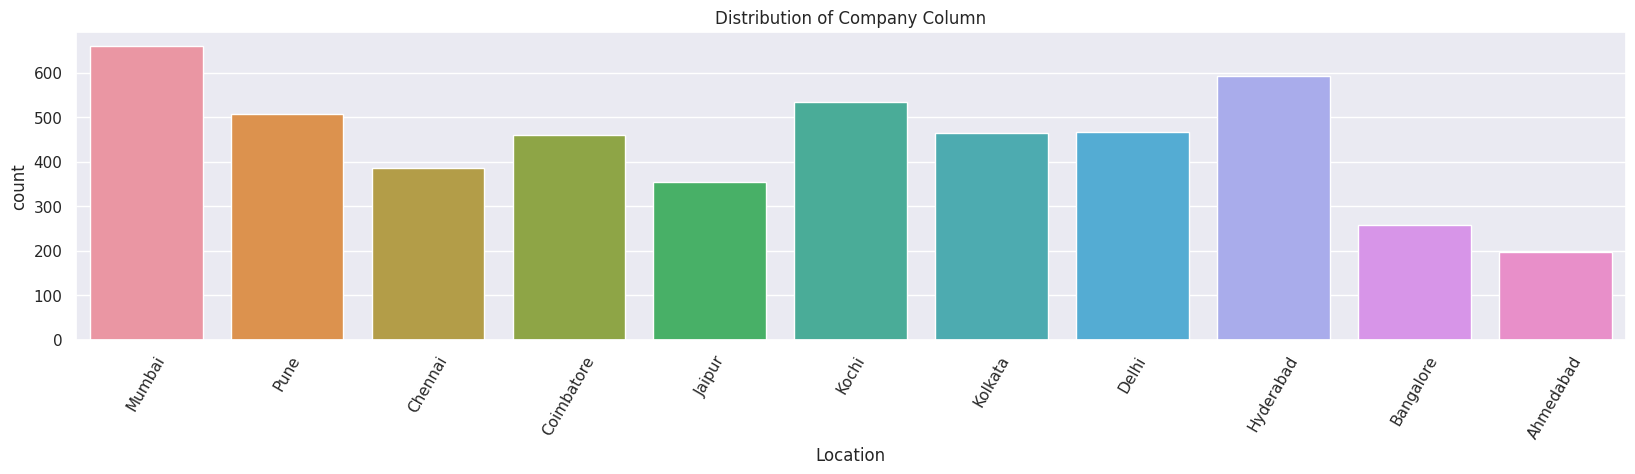

In [45]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Location');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

# Price

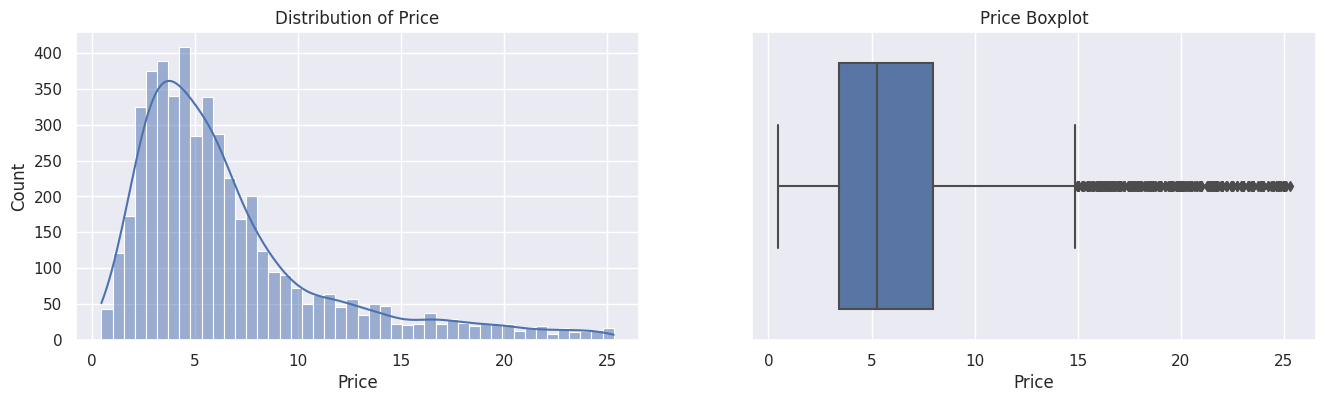

In [46]:
plot_num(df,'Price')

## Bivariet Analysis

In [47]:
agg = df.groupby('Year')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Year vs Mean Price')
fig.show()

In [48]:
fig = px.scatter(df,x='Kilometers_Driven',y='Price' , width=700 , height =500,title='Kilometers Driven vs Mean Price')
fig.show()

In [49]:
agg = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Fuel Type vs Mean Price')
fig.show()

In [50]:
agg = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Transmission Type vs Mean Price')
fig.show()

In [51]:
agg = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Owner Type vs Mean Price')
fig.show()

In [52]:
fig = px.scatter(df,x='Engine',y='Price' , width=700 , height =500,title='Engine vs Mean Price')
fig.show()

In [53]:
fig = px.scatter(df,x='Power',y='Price' , width=700 , height =500,title='Power vs Mean Price')
fig.show()

In [54]:
agg = df.groupby('Seats')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Seats vs Mean Price')
fig.show()

In [55]:
agg = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Location vs Mean Price')
fig.show()

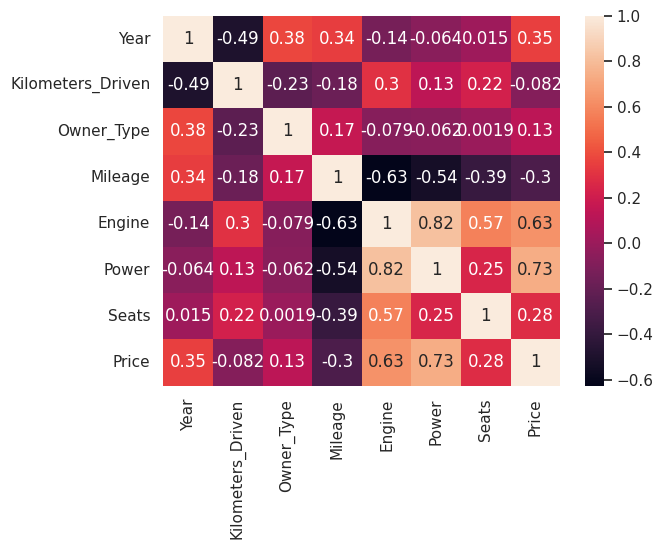

In [56]:
sns.heatmap(df.corr(),annot=True);

# Building Model

In [57]:
from sklearn.model_selection import train_test_split,GridSearchCV ,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge ,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

# Data Spliting

In [58]:
features = df.columns.drop(['Price'])
target = ['Price']

X = df[features]
y = df[target]

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns

In [59]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Data Preprocessing

In [60]:
#numerical pipeline
num_pipeline = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                PolynomialFeatures(degree=2)
)
#categorical pipeline
cat_pipeline = make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()

)
#full pipeline
preprocessor = make_column_transformer(
                (num_pipeline,num_features),
                (cat_pipeline,cat_features)
)

# Data Modeling

In [61]:
## Linear Regression
# Model Training
lin_reg = make_pipeline(
            preprocessor,
            LinearRegression()
    )
#hyperparameter tunning
param_grid = {'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    lin_reg,
                               param_grid = param_grid,
                               cv = 5,
                               scoring='r2')
Grid_search.fit(X_train,y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2}

In [62]:
#Model Training
lin_reg.fit(X_train,y_train);

#measuring accuracy
pred_train = lin_reg.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(lin_reg.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(lin_reg,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.97999999999999
Testing set Accuracy: 93.28999999999999
CV Scores Mean 93.58999999999999
CV Scores standard deviation 0.0057539790914286305


In [63]:
## Ridge
#Model Building
ridge = make_pipeline(
            preprocessor,
            Ridge(alpha=0.01)
    )
#hyperparameter tunning
param_grid = {'ridge__alpha':[0.01,0.1,1,10,100],
             'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    ridge,
                               param_grid = param_grid,
                               cv = 5,
                               scoring='r2')
Grid_search.fit(X_train,y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'ridge__alpha': 0.1}

In [64]:
#Model Training
ridge.fit(X_train,y_train);

#measuring accuracy
pred_train = ridge.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(ridge.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(ridge,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.97
Testing set Accuracy: 93.30000000000001
CV Scores Mean 93.58999999999999
CV Scores standard deviation 0.00576309120206607


In [65]:
## Lasoo
#Model Building
lasso = make_pipeline(
        preprocessor,
        Lasso(alpha=0.001)
)


In [66]:
#Hyperparameter Tunning
param_grid={
    "lasso__alpha":[0.001,0.01,0.1,1,10,100],
    "columntransformer__pipeline-1__polynomialfeatures__degree":[2,3,4,5]}
grid_search = GridSearchCV(
            lasso,
            param_grid=param_grid,
            scoring='r2',
            cv=5
)
grid_search.fit(X_train,y_train);
grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'lasso__alpha': 0.001}

In [67]:
#Model Training
lasso.fit(X_train,y_train);

#measuring accuracy
pred_train = lasso.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(lasso.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(lasso,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )


Training set Accuracy: 93.60000000000001
Testing set Accuracy: 93.02
CV Scores Mean 93.35
CV Scores standard deviation 0.0067559178796587965


In [68]:
import pickle

# Save the model as a pickle file
filename = 'car_price_prediction_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lin_reg, file)
